## Parameters in Trainer class in Transformers library

[Hugging face trainer class](https://huggingface.co/docs/transformers/en/main_classes/trainer)

In [ ]:
training_arguments = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    optim = "adam_8bit",
    logging_steps=10,
    evaluation_strategy="steps",
    do_eval = True,
    eval_steps = 50,
    save_steps = 100,
    fp16 = not torch.cuda.is_bf16_supported(),
    bf16 = torch.cude_is_bf16_supported(),
    num_train_epochs = 3,
    weight_decay = 0.0,
    warmup_ratio = 0.1,
    lr_scheduler_type = "linear",
    gradient_checkpointing = True,
    learning_rate=1e-4,
    num_train_epochs=3,
    max_Steps = 1000)

Hyperparameters are settings or configurations used to control training of LLMs. These are set before training begins and significantly affect the training of the model

##Batch Size:

Let's clarify and structure the information you provided about the batch size hyperparameter in training Large Language Models (LLMs):

### Understanding Batch Size in LLM Training

**Definition:**
Batch size is a critical hyperparameter in the training of neural networks, including LLMs. It determines the number of training examples used in one forward/backward pass, which is one step of model training.

### Key Aspects of Batch Size

1. **Data Segmentation**:
   - Training data is divided into numerous batches.
   - Model weights are updated after processing each batch.

2. **Impacts of Smaller Batch Sizes**:
   - **Regularization**: Acts as a form of regularization, making the model robust and helping it generalize better.
   - **Training Dynamics**: More susceptible to falling into local minima; training takes longer due to more frequent updates but typically results in lower generalization error.

3. **Impacts of Larger Batch Sizes**:
   - **Training Speed**: Larger batches can speed up the training process due to fewer updates to the model and better hardware utilization.
   - **Memory Requirements**: Requires more computational memory, making it suitable for high-resource environments.
   - **Gradient Estimation**: Less precise gradient estimates, which can sometimes hinder the model from finding the smallest loss.

### Practical Guidelines for Setting Batch Size

- **Hardware Limitations**:
  - Continuously increase the batch size until you encounter GPU/CUDA memory limitations.
  - Utilize hardware optimizations available for specific batch sizes.

- **Consistency Across Stages**:
  - Typical settings like `per_device_train_batch_size=4` and `per_device_eval_batch_size=4` ensure consistency in resource usage across different training and evaluation stages.

- **Optimal Values**:
  - Avoid odd numbers for batch sizes as GPUs are often optimized to perform more efficiently with even numbers.

### Conclusion

Choosing the right batch size is a balance between training efficiency, hardware capabilities, and the specific characteristics of the data and model architecture. It's crucial to experiment with different sizes to find the optimal configuration that offers a good trade-off between speed and performance.


Example of finetuning tiny LLAMA model:
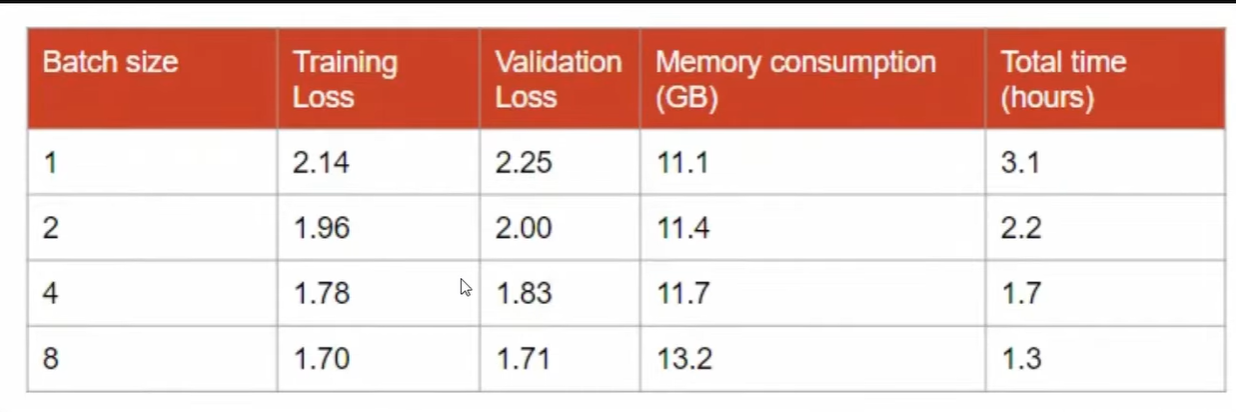

Here's a structured explanation of Padding and its relevance in the context of training Large Language Models (LLMs):

### Understanding Padding in LLM Training

**Definition:**
Padding is a preprocessing technique used in the training of neural networks, including LLMs, to standardize the lengths of sequences (e.g., text inputs) so that they fit into a consistent format suitable for batch processing.

### Key Aspects of Padding

1. **Purpose**:
   - **Uniformity**: Ensures that all input data samples in a batch have the same size or shape, which is necessary for model processing.
   - **Efficiency**: Facilitates efficient matrix operations across a batch by eliminating the need for handling varying sequence lengths at runtime.

2. **Techniques**:
   - **Zero Padding**: The most common padding method where zeros are added to sequences to reach the required length.
   - **Left vs. Right Padding**:
     - **Right Padding**: Appends zeros at the end of sequences. Common in many applications as it preserves the original sequence order when processing begins.
     - **Left Padding**: Adds zeros at the beginning of sequences. Important in specific contexts like using Flash Attention mechanisms.

### Practical Guidelines for Using Padding

- **Maximum Sequence Length**:
  - Determine an appropriate maximum sequence length for your dataset. This involves balancing between adequate coverage of data and computational efficiency. Sequences longer than this length can be truncated, and shorter ones are padded.

- **Flash Attention**:
  - **Special Requirement**: When employing Flash Attention mechanisms, left padding is preferred. This approach is necessary because Flash Attention processes sequences in a way where the initial elements receive the attention mechanism first, hence padding on the left ensures that attention is not disproportionately applied to padding zeros.

### Conclusion

Effective use of padding significantly impacts the performance and efficiency of LLMs. It ensures that models can be trained uniformly, leading to more straightforward and computationally efficient training processes. The choice between left and right padding should be guided by the specific requirements of the neural network architecture and the attention mechanisms in use.

#### do_eval Parameter
- This parameter controls whether the model is evaluated for performance during training. When set to true, it allows for the computation of validation loss, helping monitor and adjust the model's effectiveness over training iterations. This is crucial for tuning and achieving the best model performance.

### Epochs and Steps Simplified
- An **epoch** means the model has seen every data example once. If your dataset has 1,000 items and you’re training with 100 items at a time (batch size), you need 10 steps to finish one epoch.
- During each step, the model tries to learn by adjusting its internal settings (weights) to predict better.
- The settings **num_train_epochs** and **max_steps** determine how long the training goes on. **num_train_epochs** sets how many times the model will see the entire dataset, while **max_steps** limits the total number of learning steps the model can take if it's used.

### Gradient Accumulation Steps Simplified

In machine learning, a gradient is a measure of how much the output of a model changes if you change the input a little bit. It's like a compass that tells the learning algorithm in which direction it should update its parameters (like weights) to reduce errors. Imagine it as a guide that shows the quickest path downhill to the lowest point of a valley, which represents the least error or the best performance of the model. This process of constantly adjusting in the direction of the steepest descent is called gradient descent.

- **Gradient accumulation** allows the model to effectively train with a larger batch size than the hardware can handle by summing up the gradients over multiple smaller batches.

- For example, if your ideal batch size is 1024 but your hardware can only support 256, you would process four mini-batches of 256 each before updating the model weights.

- If you set **per_device_train_batch_size** to 4 and **gradient_accumulation_steps** to 2, then the effective batch size becomes 8. This means the model accumulates gradients from two batches of 4 before performing an update.

### Gradient Checkpointing
- Gradient checkpointing is a technique designed to reduce memory usage during the training of deep neural networks by selectively storing certain activation outputs from the layers of the model.

- Instead of keeping all activations in memory for the backpropagation process, it saves only crucial ones. For the layers not saved, activations are recalculated during the backward pass, which requires extra computation.

- This method is particularly useful in training very deep models, as it manages the trade-off between memory demand and computational load effectively.

### Learning Rate
- The learning rate is a crucial hyperparameter in training machine learning models that determines how quickly the model adjusts its weights in response to the error it sees.

- It typically ranges between 1e-6 and 1e-3, with common recommendations around 1e-3 for effective training. Variations like 5e-4 or 1e-4 are often tested to optimize performance.

- Setting the learning rate involves a balance: too high can lead to unstable training, while too low might result in slow convergence or getting stuck in suboptimal solutions. Trial and error is a common approach to finding the right value.

### Learning Rate Scheduler (lr_scheduler_type)
- Neural networks often risk getting stuck in local minima during training, making it challenging to reach the global minimum where the best solution lies.

- The `lr_scheduler_type` helps adjust the learning rate during training to overcome this issue. A common type is "linear," which gradually decreases the learning rate, helping the model to settle into deeper and potentially better minima.

- Although both "linear" and "cosine" schedulers result in similar training losses, the "linear" scheduler is generally recommended for its consistent performance in smoothing the learning curve and potentially avoiding sharp minima. More information on this can be found in research such as [this paper](https://arxiv.org/abs/2310.07831).

### Warmup Steps and Ratio
- Warmup steps are used to gradually increase the learning rate from a lower value to a predefined target rate during the initial phase of training. This technique helps to stabilize the training process by preventing the model from adjusting too rapidly at the start.

- For example, if a model is set to train for 10,000 steps and a warmup ratio of 0.1 is applied, then the first 1,000 steps (10% of total) are used for this warmup period. During these steps, the learning rate increases linearly.

- After the warmup phase, the learning rate typically transitions to a different schedule, such as holding at a constant rate or decaying over time, to continue the training process effectively.

#### Optimizers Simplified

- **Adam:** This optimizer helps the model learn by tracking both the recent directions and speeds of the model parameters (like keeping a running tally of past movement). However, it uses quite a bit of memory.

- **AdamW:** A tweak on Adam, this version is better for long-term training because it helps prevent the model from fitting too closely to the training data (a problem called overfitting).

- **AdaFactor:** Similar to Adam but more memory-friendly. It's good for very large models because it doesn't keep track of as much information as Adam does.

- **What Optimizers Do:** These tools adjust how a model learns from data. They change the model's settings to reduce errors and improve accuracy during the learning process.

### fp16 and bf16 Simplified

- **Memory Use in Float 32:** Each Float 32 number takes up 4 bytes. So, for a model with 7 billion parameters using Float 32, you'd need at least 28GB of memory.
  
- **Using fp16:** Switching to Float 16 halves the memory requirement. That same model would now use only 14GB.

- **Difference between fp16 and bf16:** Both these formats use fewer bits than Float 32, saving memory. The main difference lies in their design; bf16 provides a broader range, making it better at handling very large or very small numbers compared to fp16.